In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [12]:
df=pd.read_csv('data/Train.csv')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [14]:
df.isna().sum()


ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [16]:
df.total_female = df.total_female.fillna(1.0)
df.total_female.isnull().any()

False

In [17]:
df.total_male = df.total_male.fillna(1.0)
df.total_male.isnull().any()

False

In [18]:
df.most_impressing.value_counts()

Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64

In [19]:
df.most_impressing = df.most_impressing.fillna("No comments")
df.most_impressing.isnull().any()

False

In [31]:
df["travel_with"].fillna("Alone", inplace = True)
df['travel_with'].isnull().any()

False

In [21]:
df.rename(columns={"total_female":"female","total_male":"male", "most_impressing":"customer_feedback"}, inplace = True)


In [25]:
df["total_nights"] = df["night_mainland"] + df["night_zanzibar"]
df["number of people"] = df["female"] + df["male"]
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'customer_feedback', 'total_cost', 'total_nights',
       'number of people'],
      dtype='object')

In [37]:
df.country = df.country.replace("SWIZERLAND", "SWITZERLAND")

In [38]:
df.country = df.country.replace("BURGARIA","BULGARIA")

In [39]:
df.country = df.country.replace("MALT","MALTA")

In [42]:
df.country = df.country.replace("DRC","DEMOCRATIC REPUBLIC OF THE CONGO")

In [ ]:

df.country = df.country.replace("DRC","DEMOCRATIC REPUBLIC OF THE CONGO")

In [43]:
df.country = df.country.replace("SCOTLAND","UNITED KINGDOM")

In [44]:
df.country = df.country.replace("UAE","UNITED ARAB EMIRATES")

In [46]:
df.country = df.country.replace("PHILIPINES","PHILIPPINES")

In [47]:
df.country = df.country.replace("DJIBOUT","DJIBOUTI")

In [48]:
df.country = df.country.replace("MORROCO","MOROCCO")

In [49]:
!pip install country-converter
import country_converter as coco

cc = coco.CountryConverter()
iso3 = np.array([])
for i in range(0, len(df)):
    iso3= np.append(iso3, cc.convert(names=df['country'][i], to='ISO3' ))
df['ISO3'] = pd.DataFrame(iso3) 

In [51]:
cc = coco.CountryConverter()
continent = np.array([])
for i in range(0, len(df)):
    continent = np.append(continent, cc.convert(names=df['country'][i], to='Continent' ))
df['continent'] = pd.DataFrame(continent) 
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'customer_feedback', 'total_cost', 'total_nights',
       'number of people', 'ISO3', 'continent'],
      dtype='object')

In [52]:
df.head()

,ID,country,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,...,night_mainland,night_zanzibar,payment_mode,first_trip_tz,customer_feedback,total_cost,total_nights,number of people,ISO3,continent
0,tour_0,SWITZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,13.0,0.0,Cash,No,Friendly People,674602.5,13.0,2.0,CHE,Europe
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,21.0,1.0,GBR,Europe
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,1.0,31.0,Cash,No,Excellent Experience,3315000.0,32.0,1.0,GBR,Europe
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,11.0,0.0,Cash,Yes,Friendly People,7790250.0,11.0,2.0,GBR,Europe
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,7.0,4.0,Cash,Yes,No comments,1657500.0,11.0,1.0,CHN,Asia


In [53]:
df.eval('total_cost_euro = total_cost* 0.00044', inplace = True)
df.head(5)

,ID,country,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,...,night_zanzibar,payment_mode,first_trip_tz,customer_feedback,total_cost,total_nights,number of people,ISO3,continent,total_cost_euro
0,tour_0,SWITZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0.0,Cash,No,Friendly People,674602.5,13.0,2.0,CHE,Europe,296.82510
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,21.0,1.0,GBR,Europe,1414.55886
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,31.0,Cash,No,Excellent Experience,3315000.0,32.0,1.0,GBR,Europe,1458.60000
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,0.0,Cash,Yes,Friendly People,7790250.0,11.0,2.0,GBR,Europe,3427.71000
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,4.0,Cash,Yes,No comments,1657500.0,11.0,1.0,CHN,Asia,729.30000


In [54]:
###removing outliers Inter-quartile Range (IQR)
###IQR = Q3-Q1
###Lower Boundary = Q1-1.5*IQR
###Upper Boundary = Q3+1.5*IQR

In [55]:
###removing outliers Inter-quartile Range (IQR)
###IQR = Q3-Q1
###Lower Boundary = Q1-1.5*IQR
###Upper Boundary = Q3+1.5*IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[(df[ft] < lower_bound)| (df[ft] > upper_bound)]
    return ls

In [57]:
#create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['night_mainland','night_zanzibar','total_cost_euro']:
    index_list.extend(outliers(df,feature))

In [58]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [60]:
df2 =remove(df,index_list)

In [61]:
df2.to_csv('df3.csv',index=False)

In [63]:
new_df3 =pd.read_csv('df3.csv')

In [64]:
new_df3.shape

(3962, 28)

In [65]:
new_df3.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'customer_feedback', 'total_cost', 'total_nights',
       'number of people', 'ISO3', 'continent', 'total_cost_euro'],
      dtype='object')

In [158]:
variables = ['country', 'ISO3', 'continent', 'age_group', 'travel_with',
       'female', 'male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'customer_feedback']
X = new_df3[variables]
y = new_df3.total_cost_euro




In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder


categorical_features = ["country", "ISO3", "continent", "age_group", "travel_with",
       "purpose", "main_activity", "info_source",
       "tour_arrangement", "package_transport_int", "package_accomodation",
       "package_food", "package_transport_tz", "package_sightseeing",
       "package_guided_tour", "package_insurance",
       "payment_mode", "first_trip_tz", "customer_feedback"] 
categorical_transformer =OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
     
        ("cat", categorical_transformer, categorical_features),
    ]
)
    



In [168]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.434


In [169]:
y_pred = model.predict(X_test)
y_pred

ValueError: X has 23 features, but OneHotEncoder is expecting 20 features as input.

In [70]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 19610164052452.88
RMSE: 4428336.488169444
R2: 0.40612882075350765


In [72]:
customer_segmentation = []
for row in new_df3['total_cost_euro']:
        if row < 5000 :    customer_segmentation.append('low cost')
        elif row < 10000:  customer_segmentation.append('medium cost')
        else:      customer_segmentation.append('high cost')

In [75]:
new_df3['customer_segmentation'] = customer_segmentation


In [150]:

variables = ["country",
"continent",         
"age_group",     
"travel_with",   
"total_nights",                
"purpose",     
"main_activity", 
"info_source",
"tour_arrangement",   
"package_transport_int",    
"package_accomodation",    
"package_food",          
"package_transport_tz",   
"package_sightseeing",      
"package_guided_tour",      
"package_insurance",
"night_mainland",
"night_zanzibar",
"total_nights",
"first_trip_tz"]

X = new_df3[variables]
y = new_df3.customer_segmentation


In [151]:


categorical_features = [ 
"continent",         
"age_group",     
"travel_with",                   
"purpose",     
"main_activity", 
"info_source",
"tour_arrangement",   
"package_transport_int",    
"package_accomodation",    
"package_food",          
"package_transport_tz",   
"package_sightseeing",      
"package_guided_tour",      
"package_insurance",
"first_trip_tz"]
categorical_transformer =OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
     
        ("cat", categorical_transformer, categorical_features),
    ]
)
    


In [152]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.864


In [135]:
y_pred = model.predict(X_test)
y_pred

array(['low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'medium cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'medium cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'medium cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'medium cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low cost', 'low cost',
       'low cost', 'low cost', 'low cost', 'low co

In [136]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.8600252206809584


              precision    recall  f1-score   support

   high cost       0.00      0.00      0.00         5
    low cost       0.89      0.96      0.92       690
 medium cost       0.42      0.20      0.27        98

    accuracy                           0.86       793
   macro avg       0.44      0.39      0.40       793
weighted avg       0.83      0.86      0.84       793



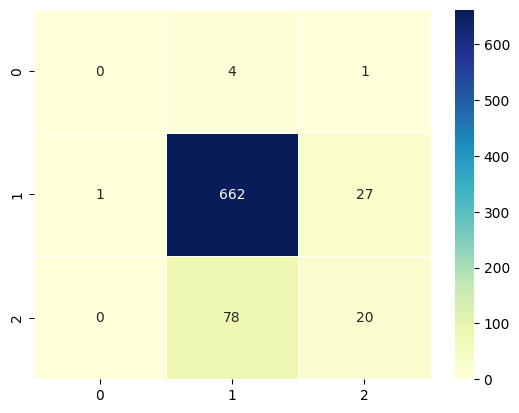

In [120]:
# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred,labels = model.classes_)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5,);